#군집화
*   비지도학습의 대표적인 기술로 x에대한 레이블이 지정 되어있지 않은 데이터를 그룹핑하는 분석 알고리즘
*   데이터들의 특성을 고려해 비슷한 특성을 가진 데이터 집단(클러스터)을 정의하고 데이터 집단의 대표할 수 있는 중심점을 찾는 것
*이상탐지에 사용



## K-means
k-means 클러스터링은 데이터를 k개의 클러스터(cluster, 무리)로 분류

1) 사용자로부터 입력받은 k의 값에 따라, 임의로 클러스터 중심(centroid) k개를 설정해준다.

2) k개의 클러스터 중심으로부터 모든 데이터가 얼마나 떨어져 있는지 계산한 후에, 가장 가까운 클러스터 중심을 각 데이터의 클러스터로 정해준다.  

3) 각 클러스터에 속하는 데이터들의 평균을 계산함으로 클러스터 중심을 옮겨준다.  

4) 보정된 클러스터 중심을 기준으로 2, 3단계를 반복한다.

5) 더이상 클러스터 중심이 이동하지 않으면 알고리즘을 종료한다. 

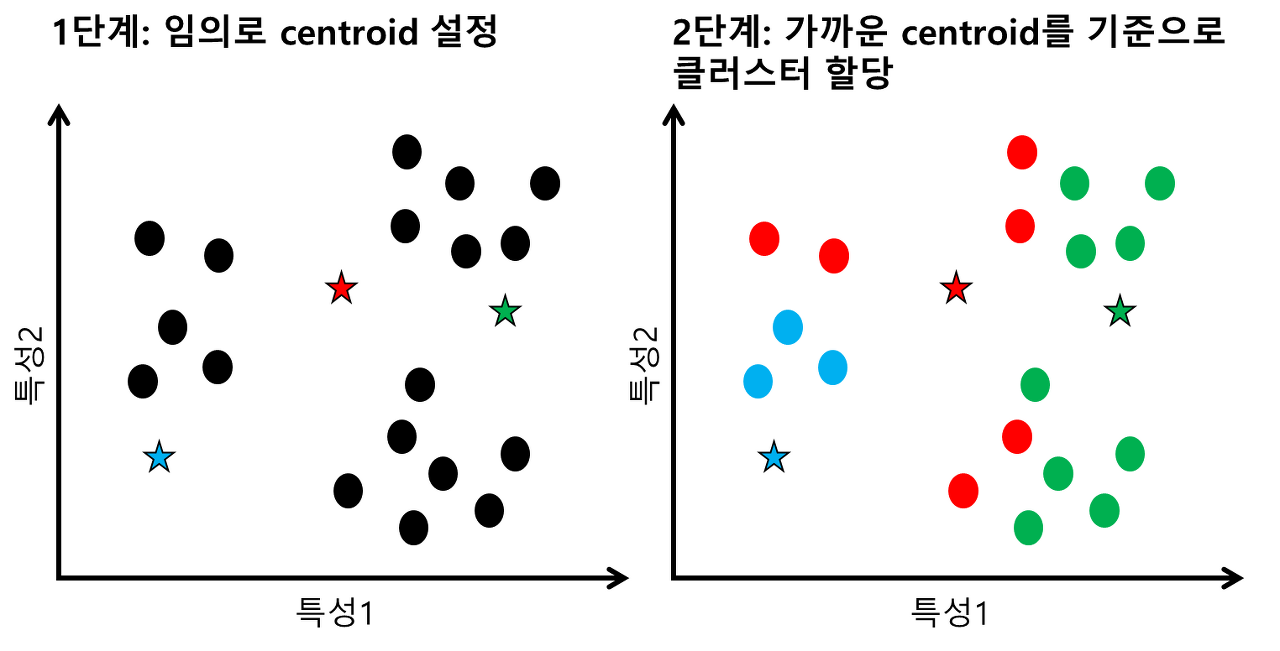

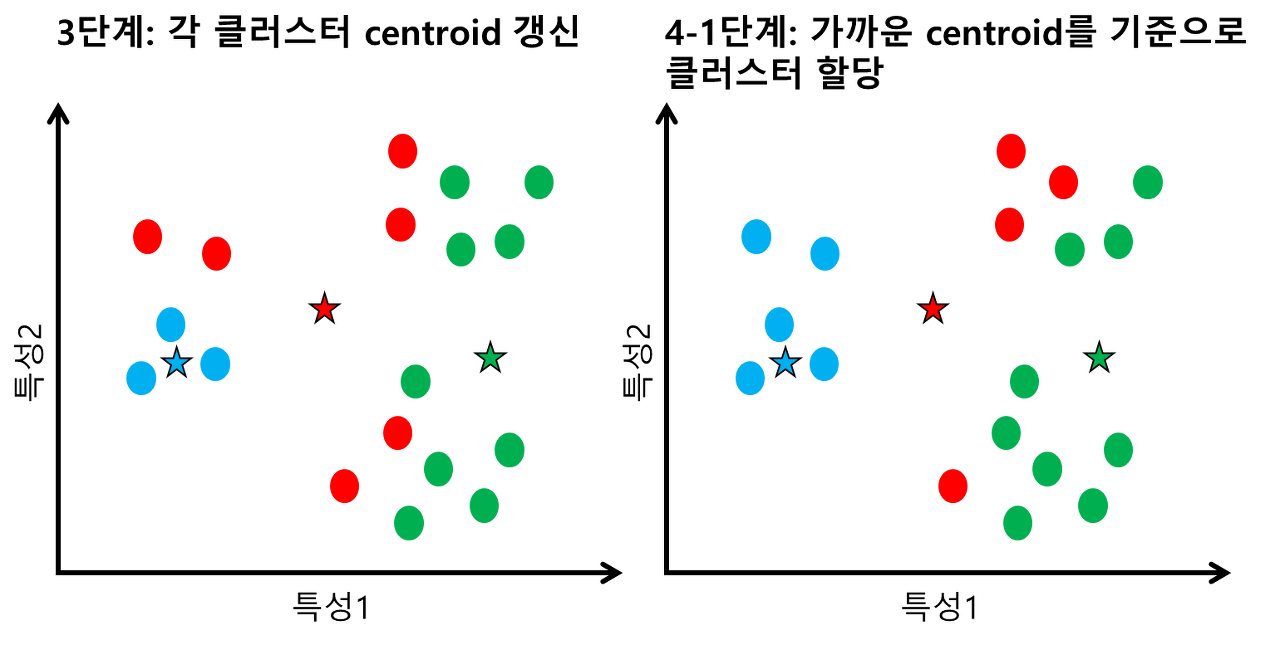


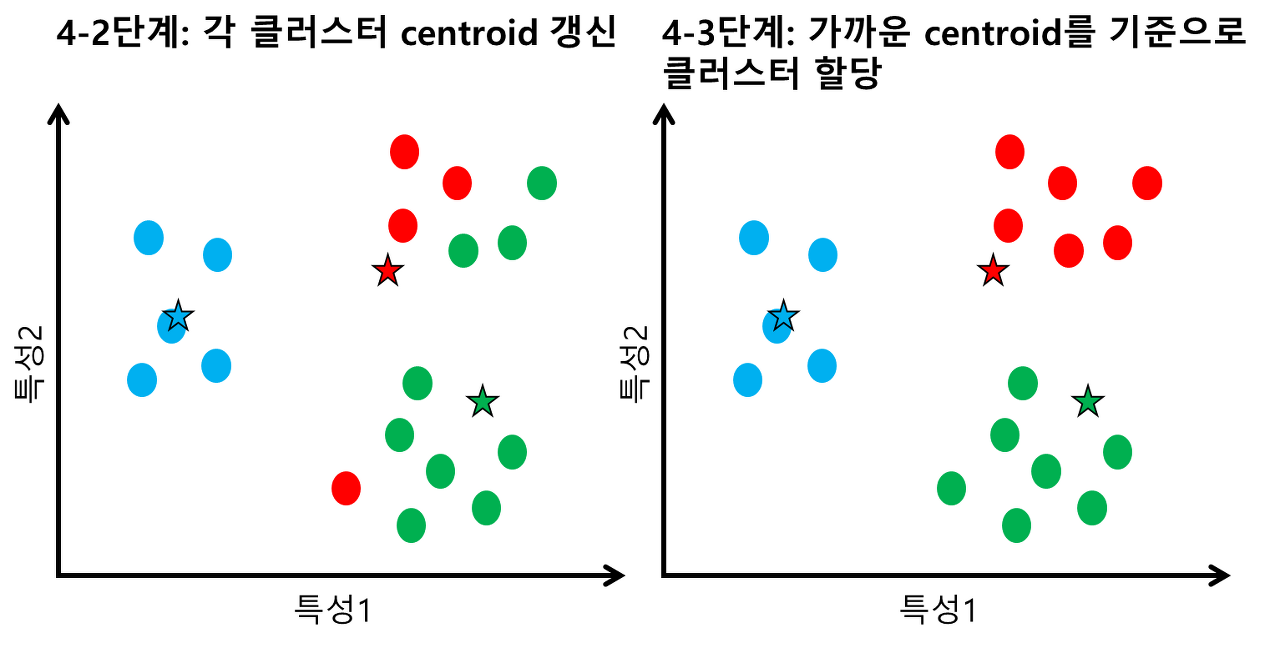

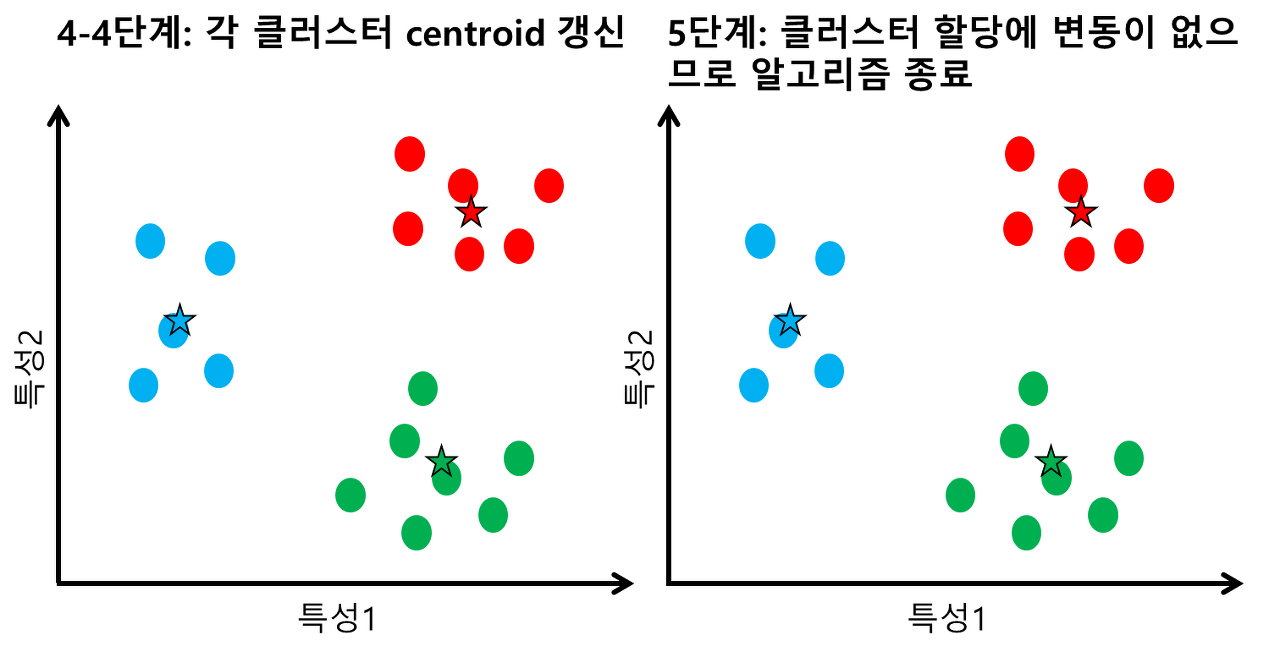



1.   장점
*   일반적으로 많이 사용
*   알고리즘이 쉽고 간결함

2.   단점
*   K값 선택이 어려움
*   반복 수행 시 수행 시간
*   거리 기반 알고리즘으로 속성의 개수가 많을 경우 군집화 정확도가 떨어짐(PCA로 차원 감소를 적용하기도 함)
*   거리의 평균값을 구하는 알고리즘이기 때문에 이상치에 취약함







In [ ]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
 
iris = load_iris()
 
irisdf = pd.DataFrame(data = iris.data, 
                      columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

#n_clusters : k값, init : 초기 중심 설정 방식. 일반적으로 'k-means++'이 디폴트 , max_iter: 최대 반복 횟수. 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료.
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0) 
kmeans.fit(irisdf)

#각 데이터가 0,1,2라는 세 가지 군집으로 분류된 것을 확인.
print(kmeans.labels_) 

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [ ]:
irisdf['target'] = iris.target
irisdf['cluster'] = kmeans.labels_
iris_result = irisdf.groupby(['target', 'cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


- target = 0 은 클러스터 1번에 잘 군집화 되었다.

- target = 1 은 클러스터 0과 2에 분산되었는데, 0에 48개로 더 많이 가있는상태이다.

- target = 2 는 클러스터 0과 2에 분산되었는데, 2에 36개로 더 많이 가있는 상태이긴 하나 그 개수가 크게 차이나지 않는다.

##군집 시각화
2차원 평면상에서 iris 데이터의 속성 4개를 모두 표현하는 것이 적합하지 않아 PCA를 이용해 4개의 속성을 2개로 차원 축소한 후 시각화.

In [ ]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 2)
pca_transformed = pca.fit_transform(iris.data)
pca_transformed

irisdf['pca_x'] = pca_transformed[:, 0]  #x좌표
irisdf['pca_y'] = pca_transformed[:, 1]  #y좌표
irisdf


,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2,1.944110,0.187532
146,6.3,2.5,5.0,1.9,2,0,1.527167,-0.375317
147,6.5,3.0,5.2,2.0,2,2,1.764346,0.078859
148,6.2,3.4,5.4,2.3,2,2,1.900942,0.116628


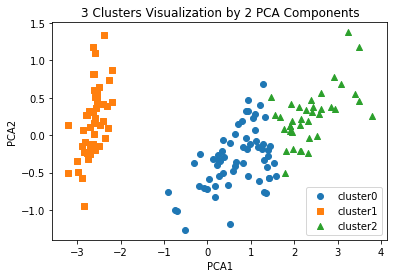

In [ ]:
# 클러스터별 인덱스 추출
marker0 = irisdf[irisdf['cluster'] == 0].index
marker1 = irisdf[irisdf['cluster'] == 1].index
marker2 = irisdf[irisdf['cluster'] == 2].index
 
 #scatter plot
plt.scatter(x = irisdf.loc[marker0, 'pca_x'], y = irisdf.loc[marker0, 'pca_y'], marker = 'o')
plt.scatter(x = irisdf.loc[marker1, 'pca_x'], y = irisdf.loc[marker1, 'pca_y'], marker = 's')
plt.scatter(x = irisdf.loc[marker2, 'pca_x'], y = irisdf.loc[marker2, 'pca_y'], marker = '^')
 
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.legend(['cluster0', 'cluster1', 'cluster2'])
plt.show()


###군집화 가상데이터
- make_blobs(): 대표적인 군집화 데이터 생성기로 개별 군집의 중심점과 표준 편차 제어기능이 있다.

- make_classfication(): 역시 대표적인 군집화 데이터 생성기로 노이즈를 추가할 수 있다.

- make_circle(), make_moons()은 중심 기반 군집화로 해결하기 어려운 데이터를 생성.


In [ ]:
from sklearn.datasets import make_blobs
import numpy as np

# n_samples : 생성할 총 데이터 개수, n_features: 데이터의 피처 개수, centers:숫자로 설정하면 군집의 개수, ndarray 형태로 표현할 경우 개별 군집 중심점의 좌표, cluster_std : 생성될 군집 데이터의 표준 편차
# 200개의 레코드, 2개의 피처, 3개의 군집
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# target 값 분포
unique, counts = np.unique(y, return_counts=True)
print(f"군집종류: {unique}, 각 군집별 갯수: {counts}")


(200, 2) (200,)
군집종류: [0 1 2], 각 군집별 갯수: [67 67 66]


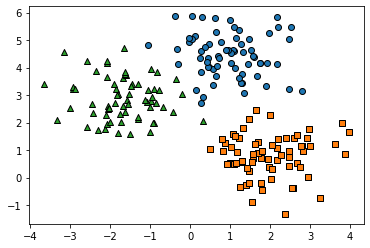

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# 데이터 프레임 생성
cluster_df = pd.DataFrame(X, columns=["ftr1","ftr2"])
cluster_df["target"] = y

# target 값 종류
target_list = np.unique(y)

# 가상 데이터 시각화
markers=['o', 's', '^']

for target in target_list:
    target_cluster = cluster_df[cluster_df['target'] == target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], 
                edgecolor='k', marker=markers[target] )
    
plt.show()

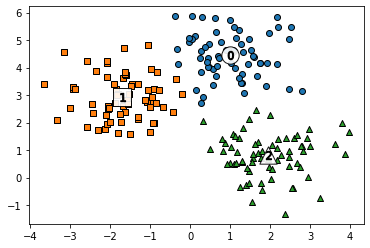

In [ ]:
from sklearn.cluster import KMeans


# K-Means 객체 생성
kmeans = KMeans(n_clusters=3, init="k-means++", max_iter=200, random_state=0)

# cluster label (fit 후 labels_, fit_predict의 결과가 같았다.)
cluster_labels = kmeans.fit_predict(cluster_df.iloc[:,:-1])
cluster_df["kmeans_label"] = cluster_labels

# 개별 클러스터의 중심 위치 좌표
centers = kmeans.cluster_centers_

# cluster 값 종류
unique_labels = np.unique(cluster_labels)

markers=['o', 's', '^', 'P','D','H','x']

for cluster in unique_labels:
    
    # 각 군집 시각화
    cluster_v = cluster_df[cluster_df['kmeans_label'] == cluster]    
    plt.scatter(x=cluster_v['ftr1'], y=cluster_v['ftr2'], edgecolor='k', marker=markers[cluster] )
    
    # 군집별 중심 위치 시각화
    center_xy = centers[cluster]
    
    plt.scatter(x = center_xy[0], y = center_xy[1], s=300, color='white',
                alpha=0.9, edgecolor='k', marker = markers[cluster])
    
    plt.scatter(x = center_xy[0], y = center_xy[1], s=70, color='k', 
                edgecolor='k', marker = f"${cluster}$")
    
    
plt.show()

In [ ]:
cluster_df.groupby(['target','kmeans_label']).size()

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
dtype: int64

#군집평가
- 비지도학습의 특성상 어떠한 지표라도 정확하게 성능을 평가하기 어렵다


##실루엣 분석
다른 군집간은 비슷한 정도의 여유 거리가 있고, 동일 군집 데이터끼리는 가까운지 분석
- 실루엣 계수를 기반으로 하며 실루엣 계수는 개별 데이터가 가지는 군집화 지표이다.

실루엣 계수는 다음과 같이 표현할 수 있다.

s(i) = (b(i)−a(i)) / max(a(i),b(i))

- a(i): i번째 데이터에서 자신이 속한 군집내의 다른 데이터까지의 거리들의 평균
- b(i): i번째 데이터에서 가장 가까운 타 군집내의 다른 데이터까지의 거리들의 평균
- b(i)−a(i) : 두 군집 간 거리가 얼마나 떨어져 있는가
- / max(a(i),b(i)) : 정규화

실루엣 계수는 -1 ~ 1 사이 값을 가지며 1에 가까울수록 근처 군집과 멀리 떨어져 있다는 의미이다.

0에 가까울수록 근처 군집과 가까워지며, 음수값은 
i
번째 데이터가 아예 다른 군집에 할당되었다는 의미이다.

<좋은 군집화가 되려면?>


1.   전체 실루엣 계수의 평균값, (silhouette_score()) : 0~ 1 사이의 값, 1에 가까울수록 좋다.
2.   전체 실루엣 계수의 평균값과 더불어 개별 군집의 편균값의 편차가 크지 않아야 함. 개별 군집의 실루엣 계수 평균값이 전체 실루엣 계수의 평균값에서 크게 벗어나지 않아야함. 






In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# iris 데이터
iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
iris_df = pd.DataFrame(data=iris.data, columns=feature_names)

# KMeans
kmeans = KMeans(n_clusters=3, init="k-means++", max_iter=300, random_state=0)
kmeans.fit(iris_df)

# 데이터 프레임에 cluster 추가
iris_df["cluster"] = kmeans.labels_

# 개별 데이터 실루엣 계수
score_samples = silhouette_samples(iris.data, iris_df.cluster)
print(f'silhouette_samples( ) return 값의 shape: {score_samples.shape}')

# 데이터 프레임에 실루엣 계수 추가
iris_df['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수
average_score = silhouette_score(iris.data, iris_df.cluster)
print(f'붓꽃 데이터셋 Silhouette Analysis Score: {average_score:.3f}')
iris_df.groupby('cluster')['silhouette_coeff'].mean()

silhouette_samples( ) return 값의 shape: (150,)
붓꽃 데이터셋 Silhouette Analysis Score: 0.553


cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

- 평균 실루엣 계수 값 : 0.553
- "1" 군집의 경우 개별 군집 실루엣 계수가 유난히 크고, 나머지 군집 실루엣 계수 평균값은 낮다. 
=> 좋은 군집화 조건이 아님.

##군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법

In [ ]:
def visualize_silhouette_sklearn(range_n_clusters, X):
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import numpy as np

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title('Number of Cluster : '+ str(n_clusters)+'\n' \
                              'Silhouette Score :' + str(round(silhouette_avg,3)))
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.show()



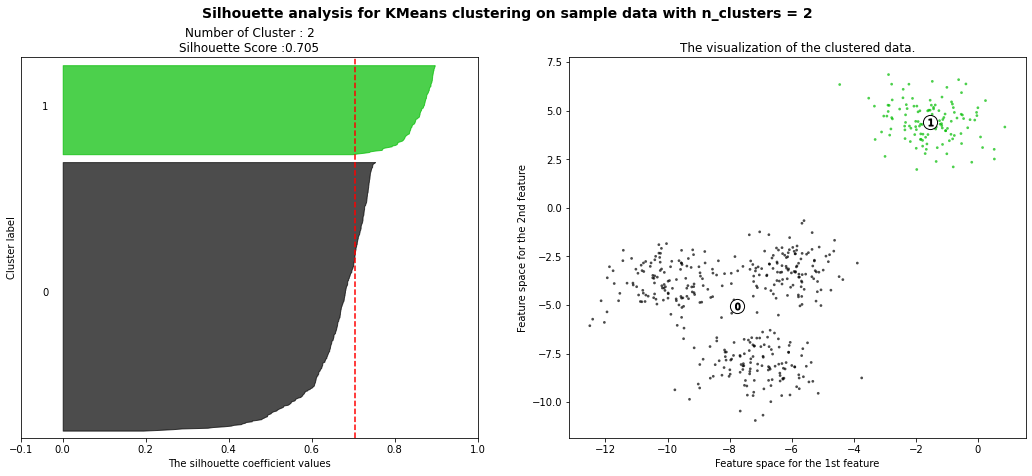

In [ ]:
# 가상데이터: 피처 2개, 클러스터 4개
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, 
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)

# K-Means K: 2
visualize_silhouette_sklearn([2], X)


*   왼쪽 그림의 x축은 실루엣 계수를 의미하며 y축은 개별 데이터 포인트로 Cluster를 구분해두었다.
*   빨간 점선(0.705)은 전체 데이터의 실루엣 계수 평균이다.


*   K를 2로 설정하였을 때 전체 실루엣 계수 평균은 0.705로 높지만 Cluster 0의 실루엣 계수는 대부분 평균에 못 미친다.
*   오른쪽 그림을 보면 Cluster 0은 내부 데이터끼리 거리가 멀리 있음을 알 수 있다. => 좋은 군집화 아님





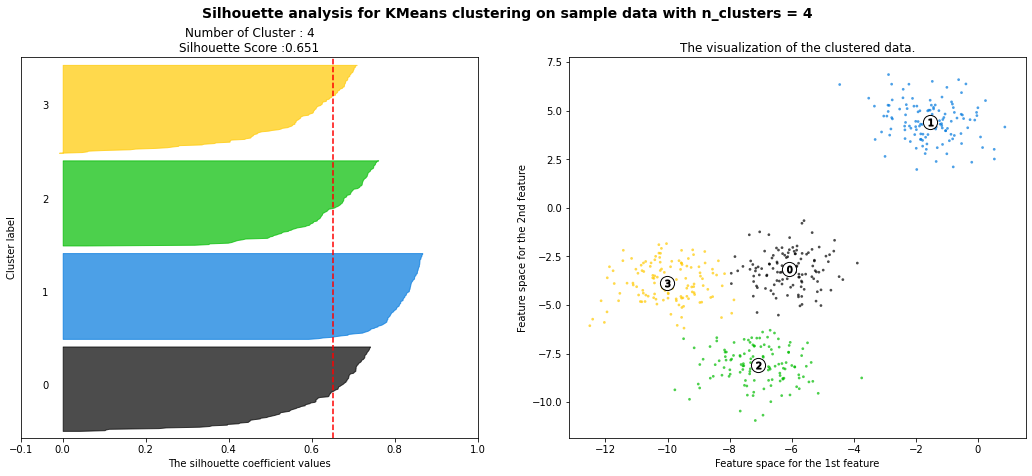

In [ ]:
# K-Means K: 4
visualize_silhouette_sklearn([4], X)

* K를 4로 설정하였을 떄 전체 실루엣 계수 평균은 0.651이고, Cluster별로 실루엣 계수가 비교적 균일하다.

* K가 2인 경우보다 전체 실루엣 계수 평균이 작지만 이상적

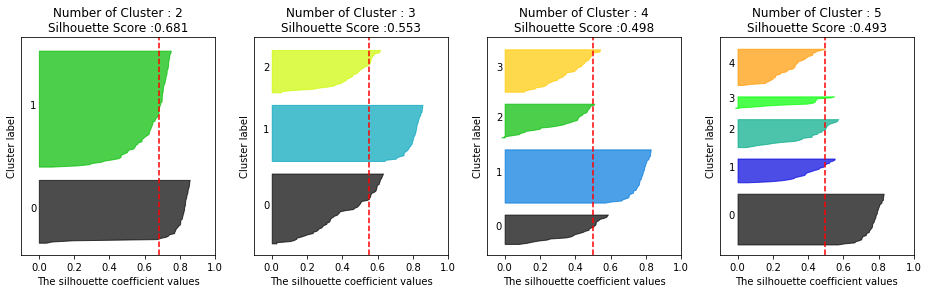

In [ ]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

# iris 군집 개수 최적화
visualize_silhouette([ 2, 3, 4, 5 ], iris.data)

* 군집 수 2일 때, 전체 실루엣 계수 평균이 가장 높고, 각 군집별 실루엣 계수 평균도 비교적 균일하다.

#평균 이동
평균 이동(Mean Shift)는 K-Means와 유사하게 중심을 군집의 중심으로 지속적으로 움직이며 군집화한다.

두 방법의 차이점은 중심을 이동하는 방법이다.

* K-Means: 중심에 소속된 데이터의 평균 거리 중심으로 이동한다.
* 평균 이동: 중심을 데이터가 모여 있는 밀도가 가장 높은 곳으로 이동한다.

###과정
1. 평균 이동은 KDE(Kernerl Density Estimation)를 이용해서 확률 밀도 함수를 구한다.

2. 데이터가 집중적으로 모여있어 확률 밀도 함수가 피크인 점을 군집 중심점으로 선정한다.

3. 이러한 방식을 전체 데이터에 반복적으로 적용하면서 데이터의 군집 중심점을 찾는다.

####KDE(커널 밀도 추정)
KDE는 커널 함수를 통해 어떤 변수의 확률 밀도 함수를 추정하는 대표적인 방법이다.

개별 관측 데이터에 커널 함수를 적용한 뒤, 이 적용 값을 모두 더한 후 데이터의 건수로 나눠 확률 밀도 함수를 추정한다.

* 대표적인 커널함수로 가우시안 분포 함수 사용
  - 대역폭 h: 값이 작은면 뾰족, 과적합 가능성. 값이 크면 완만, 과소적합 가능성

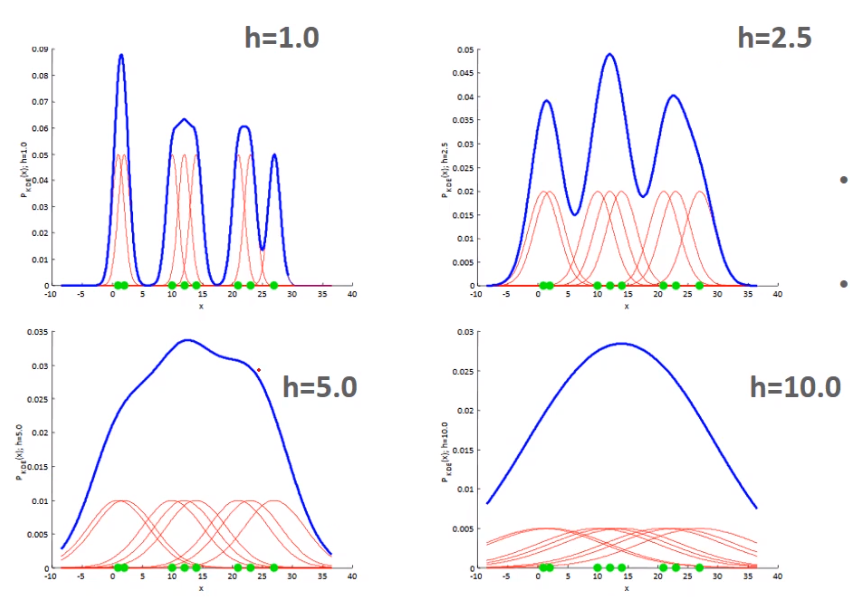








일반적으로 평균 이동 군집화는 대역폭이 클수록 적은 군집 중심점을 가지고, 작을수록 많은 군집 중심점을 가진다.

###장점
* K-Means와 달리 군집의 개수를 지정하지 않고 대역폭에 따라 군집화를 수행한다.
* 데이터를 특정 형태로 가정하거나, 특정 분포 기반 모델로 가정하지 않으므로 유연한 군집화가 가능하다.
* 이상치 영향이 크지 않다

###단점
* 알고리즘 수행 시간이 오래 걸리고 대역폭(bandwidth)의 크기에 따른 군집화 영향이 매우 크다.

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

# 클러스터 3개인 가상데이터
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)

# Mean Shift
meanshift = MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)

print(f"Mean Shift Cluster 유형: {np.unique(cluster_labels)}")

Mean Shift Cluster 유형: [0 1 2 3 4 5]


* 군집이 3개인 데이터로 평균 이동을 했는데 군집이 6개로 지나치게 세분화되어 군집화되었다. => 대역폭 증가시킴

In [ ]:
# Mean Shift
meanshift = MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)

print(f"Mean Shift Cluster 유형: {np.unique(cluster_labels)}")

Mean Shift Cluster 유형: [0 1 2]


* 3개의 군집으로 이상적인 군집화
* 대역폭에 따라 군집의 개수는 큰 영향을 받으므로 최적의 대역폭을 찾는 것이 중요하다.

In [ ]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X) # 최적의 대역폭 반환
print('bandwidth 값:', round(bandwidth,3))

meanshift = MeanShift(bandwidth = bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('best bandwidth cluster labels 유형:',np.unique(cluster_labels))

bandwidth 값: 1.816
best bandwidth cluster labels 유형: [0 1 2]


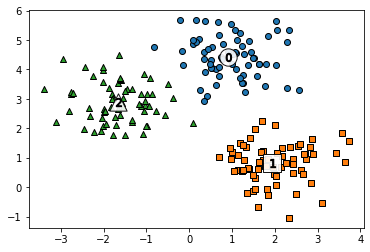

In [ ]:
# 데이터 프레임 생성
cluster_df = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
cluster_df['target'] = y
cluster_df["meanshift_label"] = cluster_labels

# 클러스터별 중심 위치 좌표
centers = meanshift.cluster_centers_

# cluster 값 종류
unique_labels = np.unique(cluster_labels)

markers=['o', 's', '^', 'P','D','H','x']

for cluster in unique_labels:
    
    # 각 군집 시각화
    cluster_v = cluster_df[cluster_df['meanshift_label'] == cluster]    
    plt.scatter(x=cluster_v['ftr1'], y=cluster_v['ftr2'], edgecolor='k', marker=markers[cluster] )
    
    # 군집별 중심 위치 시각화
    center_xy = centers[cluster]
    
    plt.scatter(x = center_xy[0], y = center_xy[1], s=300, color='white',
                alpha=0.9, edgecolor='k', marker = markers[cluster])
    
    plt.scatter(x = center_xy[0], y = center_xy[1], s=70, color='k', 
                edgecolor='k', marker = f"${cluster}$")
    
    
plt.show()

In [ ]:
cluster_df.groupby(['target','meanshift_label']).size()

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
dtype: int64

#GMM
GMM은 데이터가 여러 개의 정규 분포를 가진 데이터 집합들이 섞여서 생성된 것이라는 가정하에 군집화를 수행한다.

GMM은 여러 개의 정규 분포 곡선을 추출하고, 개별 데이터가 그 중 어떤 정규 분포에 속하는지 결정한다.

이와 같은 방식은 GMM에서는 모수 추정이라고 하는데, 모수 추정은 대표적으로 2가지를 추정한다.
* 개별 정규 분포의 평균과 분산
* 각 데이터가 어떤 정규 분포에 해당되는지의 확률

모수 추정을 위해 GMM은 EM(Expectation and Maximization) 방법을 적용한다.

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

iris_df = pd.DataFrame(iris.data, columns = feature_names)
iris_df["target"] = iris.target

from sklearn.mixture import GaussianMixture

# n_components :군집 개수
gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

# target, gmm_cluster 비교
iris_df["gmm_cluster"] = gmm_cluster_labels

iris_df.groupby(["target","gmm_cluster"]).size()

target  gmm_cluster
0       0              50
1       1               5
        2              45
2       1              50
dtype: int64

* target이 1인 경우, 5개만 다르게 매핑되고 나머지는 모두 잘 매핑되었다.

##GMM vs K-means
* 데이터 분포가 원형일 때 => K-means
* 데이터 분포가 타원일 때 => GMM


####장점
K-Means보다 유연하게 다양한 데이터에 사용 가능

####단점
알고리즘 수행 시간이 오래 걸림

In [ ]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    
    # 군집별 중심 위치: K-Means, Mean Shift 등
    if iscenter:
        centers = clusterobj.cluster_centers_
    
    # Cluster 값 종류
    unique_labels = np.unique(dataframe[label_name].values)
    
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        # 군집별 데이터 프레임
        label_cluster = dataframe[dataframe[label_name]==label]
        
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else:
            cluster_legend = 'Cluster '+str(label)
        
        # 각 군집 시각화
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        # 군집별 중심 위치 시각화
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
            
    if isNoise:
        legend_loc='upper center'
    else: 
        legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

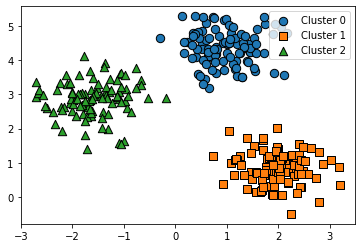

In [ ]:
#데이터 원본 분포

from sklearn.datasets import make_blobs

# 가상데이터
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

# 데이터 프레임
cluster_df = pd.DataFrame(X, columns=["ftr1","ftr2"])
cluster_df["target"] = y

# 가상데이터 시각화
visualize_cluster_plot(None, cluster_df, "target", iscenter=False)


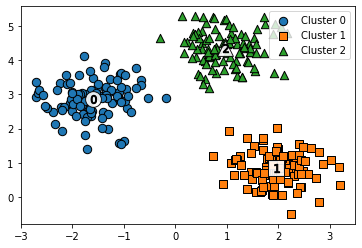

In [ ]:
#원형 K-means

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans_label = kmeans.fit_predict(X)

# 군집 레이블 추가
cluster_df["kmeans_label"] = kmeans_label

# 군집분석 시각화
visualize_cluster_plot(kmeans, cluster_df, "kmeans_label", iscenter=True)

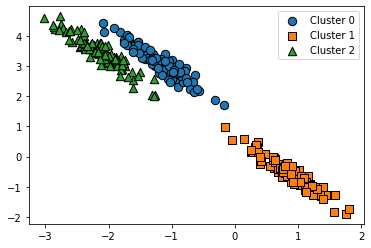

In [ ]:
#타원형 원본
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]# 길게 늘어난 타원형의 데이터 셋을 생성하기 위해 변환함. 
X_aniso = X @ transformation

# 데이터 프레임
cluster_df = pd.DataFrame(X_aniso, columns=["ftr1","ftr2"])
cluster_df["target"] = y

# 가상데이터 시각화
visualize_cluster_plot(None, cluster_df, "target", iscenter=False)

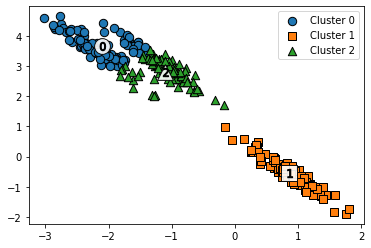

In [ ]:
# 타원형 KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)

# 군집 레이블 추가
cluster_df["kmeans_label"] = kmeans_label

# 군집분석 시각화
visualize_cluster_plot(kmeans, cluster_df, "kmeans_label", iscenter=True)

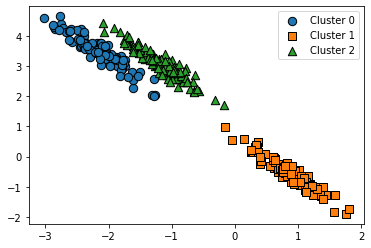

In [ ]:
# 타원형 GMM 
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit_predict(X_aniso)

# 군집 레이블 추가
cluster_df["gmm_label"] = gmm_label

# GMM은 cluster_centers_ 속성이 없음
visualize_cluster_plot(gmm, cluster_df, 'gmm_label',iscenter=False)

#DBSCAN
대표적인 밀도 기반 군집화 알고리즘이다.

특정 공간 내에 데이터 밀도 차이를 기반 알고리즘으로 하고 있어 복잡한 기하학적 분포를 가진 데이터에도 군집화를 잘 수행한다. 
(K-means, 평균이동, GMM으로는 군집화 힘든 데이터)

##DBSCAN 주요 파라미터
* 입실론 주변 영역(epsilon): 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역
* 최소 데이터 개수(min points): 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 갯수

##DBSCAN 데이터 포인트
* 핵심 포인트(core point): 주변 영역 내에 최소 데이터 갯수 이상의 타 데이터를 가지고 있는 경우
* 이웃 포인트(neighbor point): 주변 영역 내에 위치한 타 데이터를 명칭
* 경계 포인트(border point): 핵심 포인트는 아니지만 핵심 포인트를 이웃 포인트로 가지는 데이터
* 잡음 포인트(noise point): 핵심 포인트가 아니면서 동시에 경계 포인트도 아닌 데이터

  
만약 핵심 포인트끼리 서로가 이웃 포인트라면 서로를 연결하면서 군집화를 구성한다.

경계 포인트의 경우 핵심 포인트의 이웃 포인트로서 군집의 외곽을 형성한다.

즉, 입실론 주변 영역의 최소 데이터 갯수를 포함하는 밀도 기준을 충족시키는 데이터인 핵심 포인트를 연결하면서 군집화를 한다.

In [ ]:
from pandas.core.resample import TimedeltaIndexResamplerGroupby
# GMM에서 사용한 시각화 함수
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True, title=None):
    
    # 군집별 중심 위치: K-Means, Mean Shift 등
    if iscenter:
        centers = clusterobj.cluster_centers_
    
    # Cluster 값 종류
    unique_labels = np.unique(dataframe[label_name].values)
    
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        # 군집별 데이터 프레임
        label_cluster = dataframe[dataframe[label_name]==label]
        
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else:
            cluster_legend = 'Cluster '+str(label)
        
        # 각 군집 시각화
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        # 군집별 중심 위치 시각화
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
            
    if isNoise:
        legend_loc='upper center'
    else: 
        legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    if title !=None:
      plt.title(title)
    plt.show()

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

iris_df = pd.DataFrame(iris.data, columns = feature_names)
iris_df["target"] = iris.target

In [ ]:
from sklearn.cluster import DBSCAN

#eps:입실론 주변 영역, min_samples : 최소 데이터 개수
dbscan = DBSCAN(eps = 0.6, min_samples = 8, metric = "euclidean")
dbscan_labels = dbscan.fit_predict(iris.data)

# cluster label 추가
iris_df["dbscan_cluster"] = dbscan_labels

iris_df.groupby(["target", "dbscan_cluster"]).size()

target  dbscan_cluster
0       -1                 1
         0                49
1       -1                 4
         1                46
2       -1                 8
         1                42
dtype: int64

* 결과를 보면 -1,0,1 값이 있는데 -1은 노이즈에 속하는 군집을 의미한다. 
  * 0, 1만 군집. 

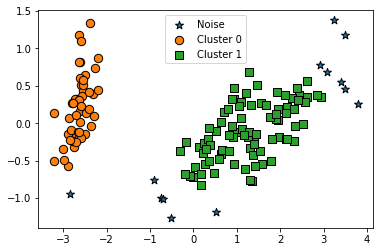

In [ ]:
from sklearn.decomposition import PCA

# pca로 차원 축소. 피처 2개만 사용
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)

# 데이터 프레임에 주성분 추가
iris_df["ftr1"] = pca_transformed[:,0]
iris_df["ftr2"] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, iris_df, "dbscan_cluster", iscenter=False)

* PCA로 2차원으로 차원 축소 후, 시각화.

* 일반적으로 eps의 값을 크게 하면 반경이 커져 포함하는 데이터가 많아지므로 노이즈 개수가 감소.

* min_samples를 크게 하면 주어진 반경 내에서 더 많은 데이터를 포함해야므로 노이즈 개수가 증가.


target  dbscan_cluster
0        0                50
1        1                50
2       -1                 3
         1                47
dtype: int64


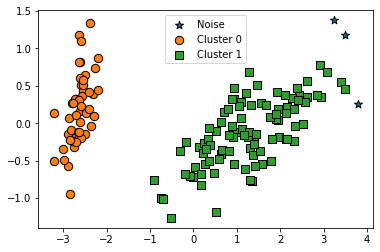

In [ ]:
# eps와 min_samples를 조정하면서 노이즈 갯수를 확인
# eps 0.6 -> 0.8
dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

iris_df['dbscan_cluster'] = dbscan_labels
iris_df['target'] = iris.target

iris_result = iris_df.groupby(["target", "dbscan_cluster"]).size()
print(iris_result)

visualize_cluster_plot(dbscan, iris_df, 'dbscan_cluster', iscenter=False)

* eps 0.6 -> 0.8 변경 후 노이즈 감소

target  dbscan_cluster
0       -1                 2
         0                48
1       -1                 6
         1                44
2       -1                14
         1                36
dtype: int64


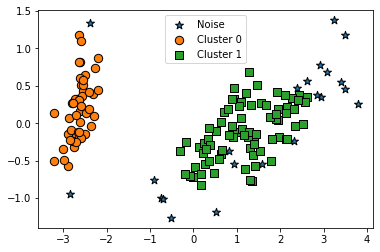

In [ ]:
# min_samples: 8 -> 16
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

iris_df['dbscan_cluster'] = dbscan_labels
iris_df['target'] = iris.target

iris_result = iris_df.groupby(["target", "dbscan_cluster"]).size()
print(iris_result)

visualize_cluster_plot(dbscan, iris_df, 'dbscan_cluster', iscenter=False)

* min_samples 8->16으로 증가, 노이즈도 증가

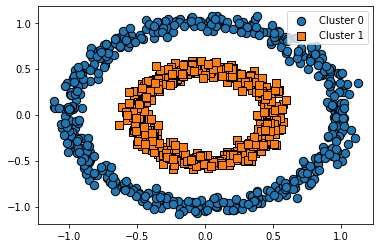

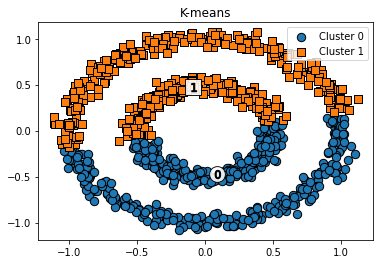

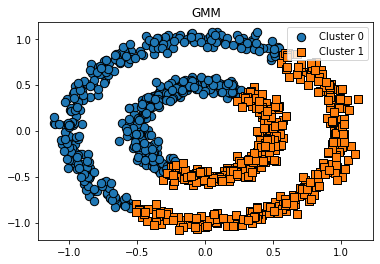

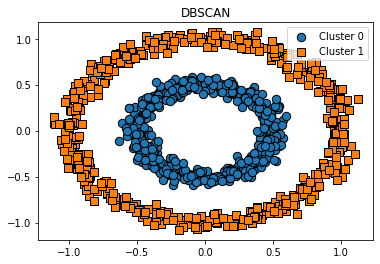

In [ ]:
# 가상데이터 시각화

from sklearn.datasets import make_circles

#make_circles: 중심 기반 군집화로 해결하기 어려운 데이터를 생성하며 2개의 피처만을 가진다
#noise: 노이즈 데이터의 비율.
#factor: 외부 원과 내부 원의 scale 비율
X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5) 

cluster_df = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
cluster_df['target'] = y


visualize_cluster_plot(None, cluster_df, 'target', iscenter=False)

####K-means
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)

cluster_df["kmeans_cluster"] = kmeans_labels

visualize_cluster_plot(kmeans, cluster_df, 'kmeans_cluster', iscenter=True, title='K-means')

####GMM
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_labels = gmm.fit_predict(X)

cluster_df["gmm_cluster"] = gmm_labels

visualize_cluster_plot(gmm, cluster_df, 'gmm_cluster', iscenter=False, title='GMM')

####DBSCAN
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric="euclidean")
dbscan_labels = dbscan.fit_predict(X)

cluster_df["dbscan_cluster"] = dbscan_labels

visualize_cluster_plot(dbscan, cluster_df, 'dbscan_cluster', iscenter=False, title='DBSCAN')